<a href="https://colab.research.google.com/github/JuliaKoryukova/Machine-Learning/blob/main/04_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders -q

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

https://ggplot2.tidyverse.org/reference/diamonds.html

In [ ]:
diamonds = sns.load_dataset('diamonds')

In [ ]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamonds.shape

(53940, 10)

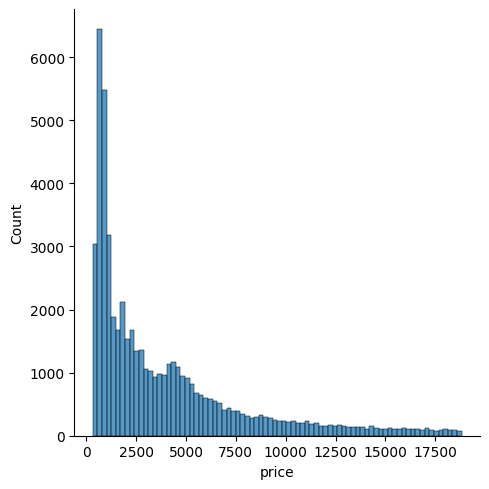

In [ ]:
sns.displot(diamonds.price)

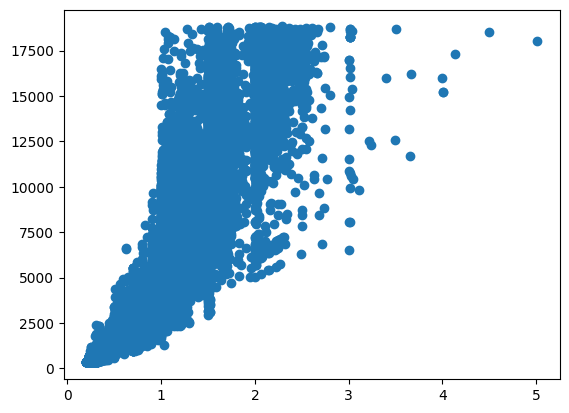

In [ ]:
plt.scatter(diamonds.carat, diamonds.price)

In [ ]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [ ]:
diamonds.cut.value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [ ]:
diamonds.color.value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [ ]:
diamonds.clarity.value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [ ]:
diamonds = diamonds.drop(['color', 'x', 'y', 'z'], axis = 1)

In [ ]:
diamonds.isna().sum()

carat      0
cut        0
clarity    0
depth      0
table      0
price      0
dtype: int64

разделим на трейн и тест

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X = diamonds.drop(columns=['price'])
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(43152, 5)

In [ ]:
# Сброс индексов
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
# Разделение на числовые и категориальные признаки
features_number = X_train.select_dtypes(include='number').columns
features_cat = X_train.select_dtypes(exclude='number').columns

In [ ]:
# Mean target encoding для категориальных признака
target_enc = ce.TargetEncoder(cols=X.select_dtypes(exclude='number').columns)
X_train = target_enc.fit_transform(X_train, y_train)
X_test = target_enc.transform(X_test)

In [ ]:
# Нормализация числовых признаков
scaler = StandardScaler()
features_number = X.select_dtypes(include='number').columns
X_train[features_number] = scaler.fit_transform(X_train[features_number])
X_test[features_number] = scaler.transform(X_test[features_number])

features_cat = X.select_dtypes(exclude='number').columns
X_train[features_cat] = scaler.fit_transform(X_train[features_cat])
X_test[features_cat] = scaler.transform(X_test[features_cat])

In [ ]:
X_train.min(), X_train.max()

(carat      -1.263866
 cut        -1.059238
 clarity    -2.134154
 depth     -13.123300
 table      -6.486141
 dtype: float64,
 carat       8.898048
 cut         1.419150
 clarity     1.728937
 depth      12.082785
 table      16.839577
 dtype: float64)

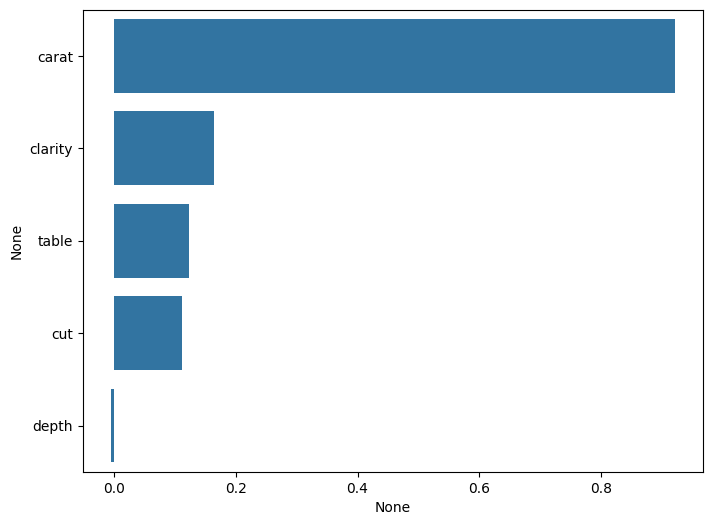

In [ ]:
X_train_df = pd.DataFrame(X_train)
correlations = X_train_df.corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(8, 6)

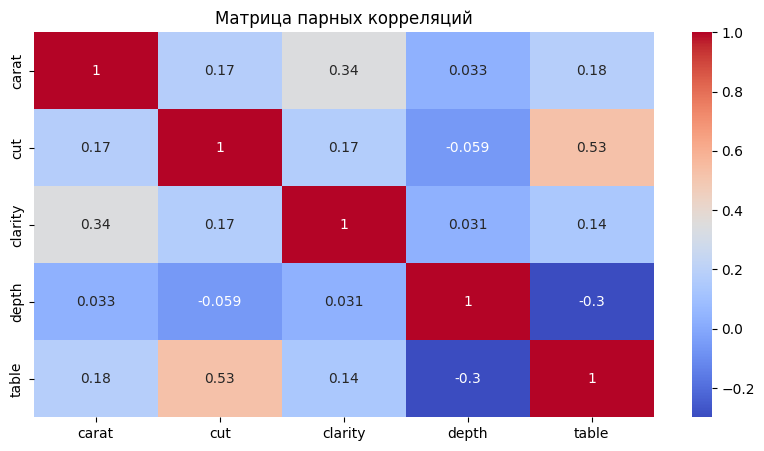

In [ ]:
# Расчет матрицы парных корреляций

correlation_matrix = X_train_df.corr()

# Визуализация матрицы парных корреляций
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица парных корреляций')
plt.show()

**LinearRegressor**

In [ ]:
Lr_model = LinearRegression()


In [ ]:
Lr_model.fit(X_train, y_train)
y_pred_lr = Lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression Test MAE: {mae_lr}")

Linear Regression Test MAE: 906.7902321969642


In [ ]:
print(Lr_model.coef_)
print(Lr_model.intercept_)

[3943.69208391  -65.53974873 -657.86499113 -175.35885251 -137.42113105]
3939.490707267334


In [ ]:
pred_y_train=Lr_model.predict(X_train)
pred_y_test=Lr_model.predict(X_test)

In [ ]:
mean_absolute_error(y_train, pred_y_train).round(2), mean_absolute_error(y_test, pred_y_test).round(2)

(906.95, 906.79)

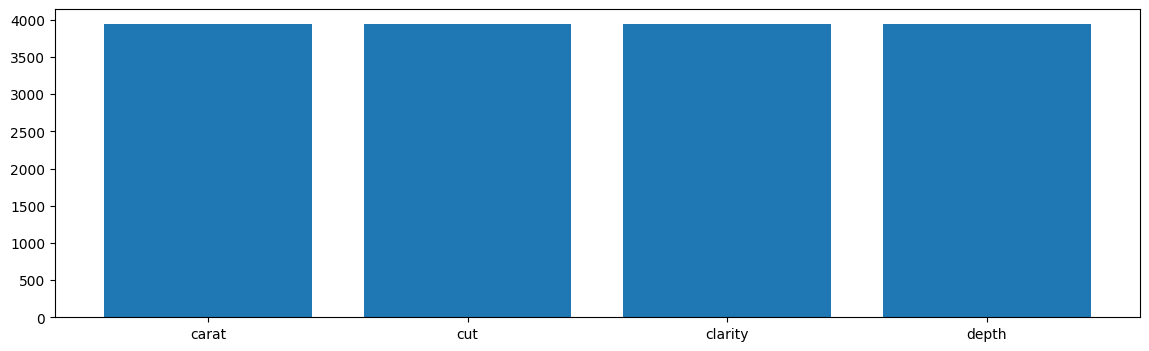

In [ ]:
# Определение важности признаков в датасете
plt.figure(figsize=(14, 4))
plt.bar(X_train_df.columns[:-1], Lr_model.coef_[0])
plt.show()

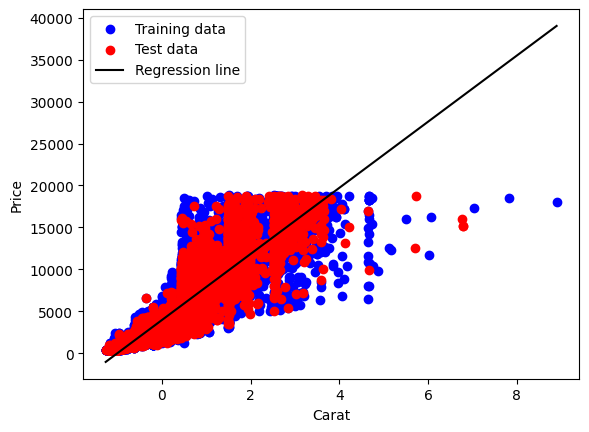

In [ ]:
plt.scatter(X_train_df['carat'], y_train, color='blue', label='Training data')
plt.scatter(X_test['carat'], y_test, color='red', label='Test data')

x = np.linspace(X_train['carat'].min(), X_train['carat'].max(), 100)
y = Lr_model.coef_[0] * x + Lr_model.intercept_

plt.plot(x, y, color='black', label='Regression line')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()

**Градиентный спуск**

In [ ]:
# Выбираем по признаку 'carat'
X_train_carat = X_train['carat']
X_test_carat = X_test['carat']


In [ ]:
# Параметры
beta_0 = 0
beta_1 = 0
learning_rate = 0.001
n = len(X_train_carat)
all_mse = []

In [ ]:
# Градиентный спуск
for _ in range(2000):
    predicted = beta_0 + beta_1 * X_train_carat
    residuals = y_train - predicted
    all_mse.append(np.sum(residuals**2))
    beta_0 = beta_0 - learning_rate * ((2/n) * np.sum(residuals) * -1)
    beta_1 = beta_1 - learning_rate * ((2/n) * residuals.dot(X_train_carat).sum() * -1)

print(f'Beta 0: {beta_0}')
print(f'Beta 1: {beta_1}')

Beta 0: 3867.624842620347
Beta 1: 3610.2222966326376


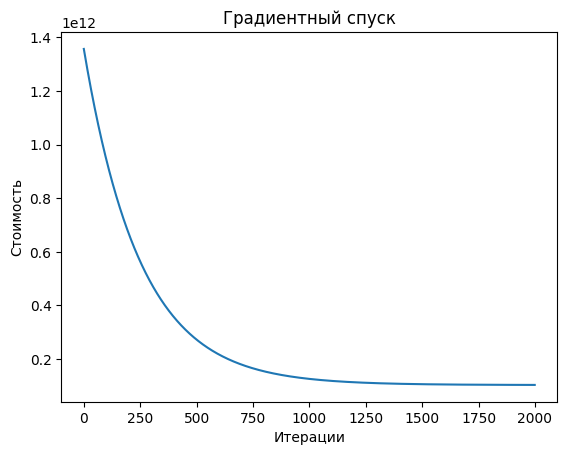

In [ ]:
# Построение графика
plt.plot(range(len(all_mse)), all_mse)
plt.xlabel('Итерации')
plt.ylabel('Стоимость')
plt.title('Градиентный спуск')
plt.show()

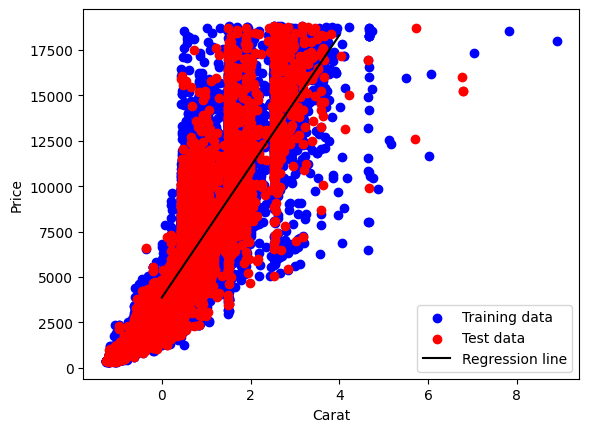

In [ ]:
# Построение линии регрессии
plt.scatter(X_train_carat, y_train, color='blue', label='Training data')
plt.scatter(X_test_carat, y_test, color='red', label='Test data')
x = np.linspace(0, 4, 100)
plt.plot(x, beta_0 + beta_1 * x, color='black', label='Regression line')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Оценка модели на тестовой выборке
y_pred_test = beta_0 + beta_1 * X_test_carat
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'Test MAE: {mae_test}')

Test MAE: 995.0230170735618


**SGDRegressor**

In [ ]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

sgd_model = SGDRegressor(max_iter=100000, random_state=42, penalty='l1', alpha=0.1)
sgd_model.fit(X_train, y_train_log)
y_pred_sgd = sgd_model.predict(X_test)
mae_sgd = mean_absolute_error(y_test_log, y_pred_sgd)
print(f"SGD Regressor MAE: {mae_sgd}")
print("Test RMSE = %.4f" % mean_squared_error(y_test_log, y_pred_sgd, squared=False))

SGD Regressor MAE: 0.3265312222447326
Test RMSE = 0.4086


**HuberRegressor**

In [ ]:
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)
y_pred_huber = huber_model.predict(X_test)
mae_huber = mean_absolute_error(y_test, y_pred_huber)
print(f"Huber Regressor MAE: {mae_huber}")

Huber Regressor MAE: 851.2178155150752


Linear Regression MAE: 906.7902321969642
SGD Regressor MAE: 0.3265312222447326
Huber Regressor MAE: 851.2178155150752


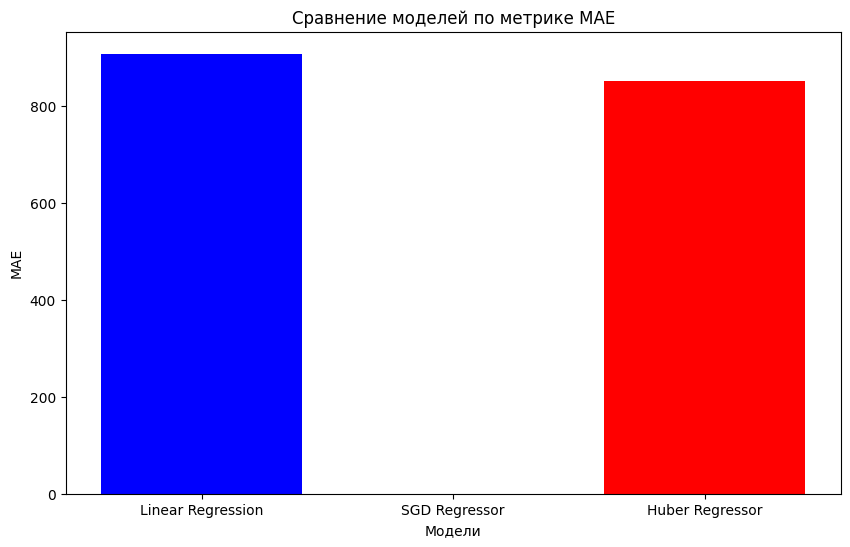

In [ ]:
print(f"Linear Regression MAE: {mae_lr}")
print(f"SGD Regressor MAE: {mae_sgd}")
print(f"Huber Regressor MAE: {mae_huber}")

# Построение графика для сравнения моделей
mae_values = [mae_lr, mae_sgd, mae_huber]
models = ['Linear Regression', 'SGD Regressor', 'Huber Regressor']

plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=['blue', 'green', 'red'])
plt.xlabel('Модели')
plt.ylabel('MAE')
plt.title('Сравнение моделей по метрике MAE')
plt.show()